In [1]:
import os

import pandas as pd
import numpy as np
from sklearn import preprocessing

#Visualisation Libraries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns


In [2]:
#load data

parentdir = os.path.dirname(os.getcwd())
datadir = os.path.join(parentdir, "GPS_Tracking_Data")
tracks_dir = os.path.join(datadir,"go_track_tracks.csv")
trackspoints_dir = os.path.join(datadir,"go_track_trackspoints.csv")

tracks = pd.read_csv(tracks_dir,index_col=False)
trackspoints = pd.read_csv(trackspoints_dir,index_col=False)
trackspoints["time"] = pd.to_datetime(trackspoints["time"])
# Remove NaN values
tracks["linha"] = tracks["linha"].fillna("no_answer")

## Data Set Description
The dataset is composed by two tables. The first table **tracks** presents general 
attributes and each instance has one trajectory that is represented by the table  
**trackspoints**. 

### Tracks Data Table - a list of trajectories  
- id_android - it represents the device used to capture the instance;  
- speed - it represents the average speed (Km/H)  
- time - it represents the time in hours
- distance - it represent the total distance (Km)  
- rating - it is an evaluation parameter. Evaluation the traffic is a way to verify the volunteers 
- perception about the traffic during the travel, in other words,  
 if volunteers move to some place and face traffic jam, maybe they will    evaluate 'bad'. (3-good, 2-normal, 1-bad).  
- rating_bus - it is other evaluation parameter. (1 - The amount of people inside the bus is little, 2 - The bus is not crowded, 3- The bus is crowded.  
- rating_weather - it is another evaluation parameter. ( 2- sunny, 1- raining).  
- car_or_bus - (1 - car, 2-bus)  
- linha - information about the bus that does the pathway  

First 10 entries:

In [3]:
tracks.iloc[0:10,:]

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,no_answer
1,2,0,30.848229,0.171485,5.290,3,0,0,1,no_answer
2,3,1,13.560101,0.067699,0.918,3,0,0,2,no_answer
3,4,1,19.766679,0.389544,7.700,3,0,0,2,no_answer
4,8,0,25.807401,0.154801,3.995,2,0,0,1,no_answer
5,10,2,1.346913,0.006682,0.009,2,0,0,1,no_answer
6,11,3,36.850787,0.228001,8.402,3,0,0,1,no_answer
7,12,1,17.405131,0.038782,0.675,3,0,0,2,no_answer
8,13,1,15.395436,0.526844,8.111,3,0,0,2,no_answer
9,14,1,8.902729,0.003033,0.027,2,0,0,2,no_answer


Summary Statistics:

In [4]:
tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,163.0,15607.650307,18644.257138,1.000000,48.500000,158.000000,37991.000000,38092.000000
id_android,163.0,7.386503,7.348742,0.000000,1.000000,4.000000,10.000000,27.000000
speed,163.0,16.704738,16.016168,0.009779,1.591016,16.685368,23.915760,96.206029
time,163.0,0.264272,0.292731,0.002175,0.035978,0.214466,0.390572,1.942948
distance,163.0,5.302411,7.639011,0.001000,0.034500,3.995000,7.333000,55.770000
rating,163.0,2.515337,0.679105,1.000000,2.000000,3.000000,3.000000,3.000000
rating_bus,163.0,0.386503,0.687859,0.000000,0.000000,0.000000,1.000000,3.000000
rating_weather,163.0,0.515337,0.841485,0.000000,0.000000,0.000000,1.000000,2.000000
car_or_bus,163.0,1.466258,0.500397,1.000000,1.000000,1.000000,2.000000,2.000000


### Trackspoints Data Table -  localization points of each trajectory  
- id: unique key to identify each point  
- latitude: latitude from where the point is  
- longitude: longitude from where the point is  
- track_id: identify the trajectory which the point belong  
- time: datetime when the point was collected (GMT-3) 

First 10 entries:

In [5]:
trackspoints.iloc[0:10,:]

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53
5,6,-10.938544,-37.062839,1,2014-09-13 07:24:59
6,7,-10.938346,-37.062588,1,2014-09-13 07:25:04
7,8,-10.938448,-37.062000,1,2014-09-13 07:25:10
8,9,-10.938666,-37.061499,1,2014-09-13 07:25:15
9,10,-10.938986,-37.060819,1,2014-09-13 07:25:21


Min and Max Values:

In [6]:
print("Min Values: \n" + str(trackspoints.min()))
print("\n")
print("Max Values: \n" + str(trackspoints.max()))
print("\nNumber of rows: %s" % trackspoints.shape[0])

Min Values: 
id                             1
latitude                -27.6032
longitude               -48.6329
track_id                       1
time         2014-09-13 07:24:32
dtype: object


Max Values: 
id                         19569
latitude                -10.2928
longitude               -36.4934
track_id                   38092
time         2016-01-19 13:01:47
dtype: object

Number of rows: 18107


**No duplicate ID's:**

In [7]:
print("Trackspoints[\"id\"] rows: " + str(trackspoints["id"].shape[0]))
print("Trackspoints[\"id\"] without duplicates rows: " + str(trackspoints["id"].drop_duplicates().shape[0]))

Trackspoints["id"] rows: 18107
Trackspoints["id"] without duplicates rows: 18107


***
## Visualization & Exploration
### Travel time for each trip in minutes

In [8]:
def calculate_total_trip_time(trackspoints, track_ids):
    total_trip_times = list()
    for id in track_ids:
        track = trackspoints[trackspoints["track_id"] == id]
        # make sure that index start at 0
        track = track.reset_index()
        last_entry_index = track.shape[0]-1
        trip_time = track["time"][last_entry_index] - track["time"][0]
        trip_time_in_minutes = np.round(trip_time.seconds/60,decimals=2)
        total_trip_times.append(trip_time_in_minutes)
    
    trips_per_id = pd.DataFrame({"track_id" : track_ids,
                                 "trip_time_in_minutes" : total_trip_times})
    trips_per_id = trips_per_id.set_index(keys="track_id")
    return trips_per_id

In [9]:
track_ids = trackspoints["track_id"].unique()
trips_per_track_id = calculate_total_trip_time(trackspoints,track_ids)

In [10]:
sorted_trip_times = trips_per_track_id.sort_values(by="trip_time_in_minutes",ascending=False)


**10 Longest Trips for travel time in minutes**

In [11]:
sorted_trip_times.iloc[0:10,:].transpose()

track_id,27,26,30,31,37962,38002,38017,41,40,19
trip_time_in_minutes,116.57,116.57,59.67,59.67,52.42,47.93,45.8,39.42,38.25,38.07


In [12]:
trips_per_track_id.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
trip_time_in_minutes,163.0,15.34638,17.133331,0.0,1.84,12.33,23.2,116.57


**Remark:** Number of rows in both tables are equal

In [13]:
x = tracks.set_index(keys="id")
x = x["time"] * 60

Check deviation of trip time in minutes from both tables: tracks[time] - calculated_trip_time 

In [14]:
deviation = np.abs(trips_per_track_id["trip_time_in_minutes"]) - np.abs(x.iloc[:])
absolute_deviation = np.abs(deviation)
print("Maximum Absolute Deviation: " + str(max(absolute_deviation)))

Maximum Absolute Deviation: 24.3293166667


**Large difference between the calculated trip time and the one stated in the tracks[time] column**
- Possible precision error

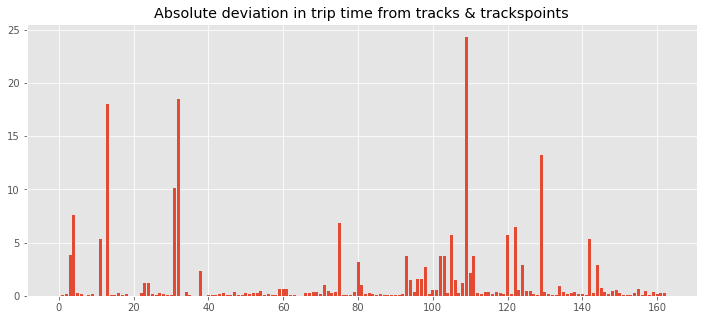

In [15]:
fig , ax = plt.subplots(figsize=(12,5))
ax.bar(range(x.shape[0]), absolute_deviation)
ax.set_title("Absolute deviation in trip time from tracks & trackspoints")
#ax.set_xlim((min(absolute_deviation), max(absolute_deviation)))
plt.show();

***
### Histogram Plots


Histogram Plots for **Tracks Data Table**

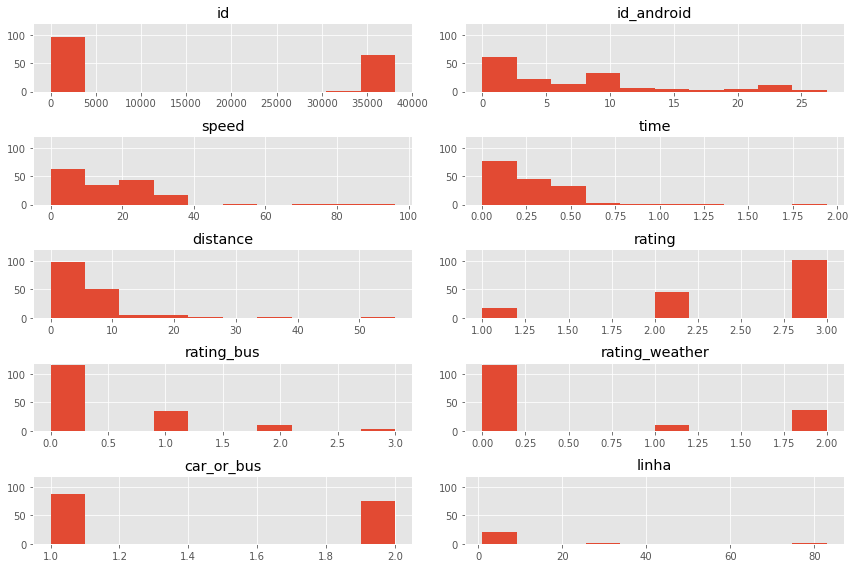

In [16]:
fig1, axes1 = plt.subplots(figsize=(12,8),nrows=5, ncols=2)
axes1_flattened = axes1.flatten()
track_colum_names = np.hstack(tracks.columns)

i = 0
for ax in axes1_flattened:
    if i != tracks.shape[1]-1:
        ax.hist(tracks[track_colum_names[i]])
        ax.set_title(track_colum_names[i])
        ax.set_ylim(0,120)
        i = i + 1
    else:
        ax.hist(tracks["linha"].value_counts())
        ax.set_title(track_colum_names[i])
        ax.set_ylim(0,120)
        i = i + 1
fig1.tight_layout();

Detailed plot for string data in **linha** column:

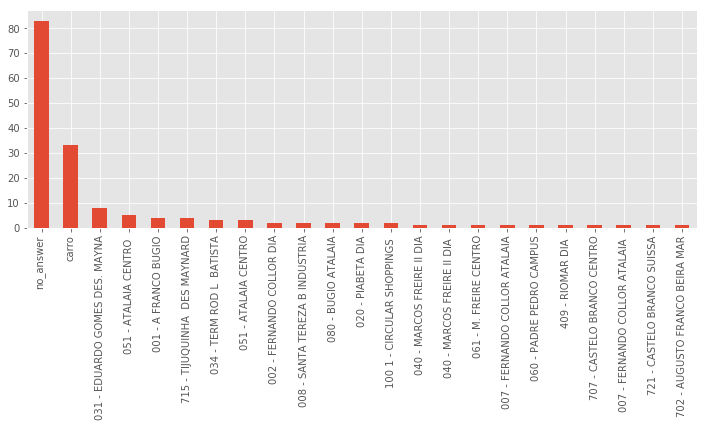

In [17]:
tracks["linha"].value_counts().plot(kind='bar',figsize=(12,4));

Self Calculated trip time in minutes:

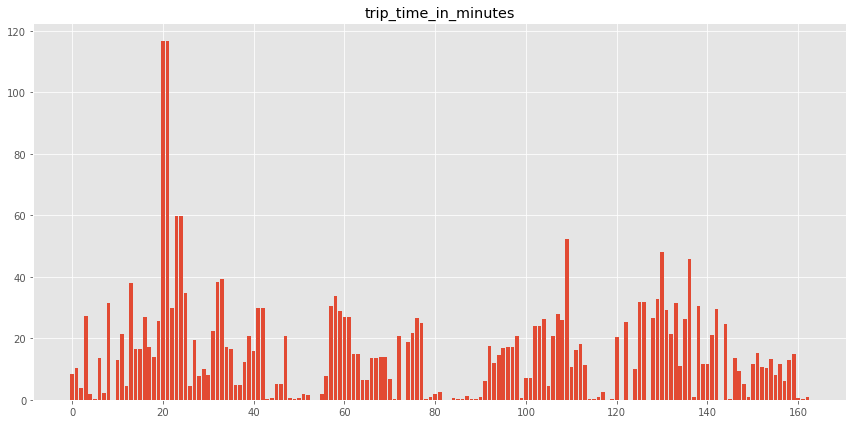

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(range(trips_per_track_id.shape[0]), trips_per_track_id["trip_time_in_minutes"])
ax.set_title("trip_time_in_minutes")
#ax.set_ylim(0,120)
fig.tight_layout();

***
# Existing Issues - Potential Preprocessing Tasks
- Large discrepancy between travel time per ``track_id`` stated in the **tracks data table** and the one calculated from the **trackspoints data table**


***
# To-Do - Suggestions
- id columns from **Tracks Data Table** is equal to track id column in **Trackspoints Data Table** --> perform a join between those two and visualize indivual tracks on a map 
- time series plots
- other fancy visualisation
- find clusters of similar trajectories


In [21]:
import gmplot

colors = 'red','blue','green','yellow','brown','orange','pink','purple','springgreen','firebrick'

def plottracks(track_id, color):
    latitudes = trackspoints[trackspoints['track_id'].isin([track_id])]['latitude']
    longitudes = trackspoints[trackspoints['track_id'].isin([track_id])]['longitude']
    gmap.plot(latitudes, longitudes, color, edge_width=5)

init_lat = trackspoints[trackspoints['track_id'].isin([1])]['latitude'][0]    
init_long = longitudes = trackspoints[trackspoints['track_id'].isin([1])]['longitude'][0]

gmap = gmplot.GoogleMapPlotter(init_lat, init_long, 18)
for track_id in range(1,10):
    plottracks(track_id, colors[track_id-1])
gmap.draw("map10.html")    



In [22]:
max(trackspoints['track_id'])
#trackspoints

#trackspoints[trackspoints['track_id'].isin([8])]

38092

In [23]:
init_lat = trackspoints[trackspoints['track_id'].isin([1])]['latitude'][0]    
init_long = longitudes = trackspoints[trackspoints['track_id'].isin([1])]['longitude'][0]

heat_lats = trackspoints['latitude']
heat_lngs = trackspoints['longitude']
gmap = gmplot.GoogleMapPlotter(init_lat, init_long, 18)
gmap.heatmap(heat_lats, heat_lngs)
gmap.draw("mapHeat.html") 

In [54]:
trackspoints['latitude']

0       -10.939341
1       -10.939341
2       -10.939324
3       -10.939211
4       -10.938939
5       -10.938544
6       -10.938346
7       -10.938448
8       -10.938666
9       -10.938986
10      -10.939343
11      -10.939641
12      -10.939858
13      -10.940077
14      -10.940389
15      -10.940746
16      -10.941179
17      -10.941480
18      -10.941533
19      -10.941533
20      -10.941533
21      -10.941533
22      -10.941533
23      -10.941533
24      -10.941533
25      -10.941533
26      -10.941542
27      -10.941742
28      -10.942100
29      -10.942444
           ...    
18077   -10.941897
18078   -10.942058
18079   -10.942259
18080   -10.942421
18081   -10.942502
18082   -10.942616
18083   -10.942873
18084   -10.943079
18085   -10.943389
18086   -10.943441
18087   -10.943516
18088   -10.943678
18089   -10.943970
18090   -10.944238
18091   -10.944160
18092   -10.943978
18093   -10.943601
18094   -10.943469
18095   -10.943469
18096   -10.933523
18097   -10.933398
18098   -10.